In [1]:
import pandas as pd
import numpy as np
import os
import datetime
import time
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

In [2]:
data=pd.read_csv('invoices_with_acct_and_cases_sample.csv')
temp=data.copy(deep=True)

In [3]:
data.dtypes

INVOICE_ID                object
ACCT_ID                   object
CR_CHK_CD                 object
CUST_STAT                 object
PYDX_SCRE_NUM            float64
INDUSTRY_NM               object
CURR_NUM_LICENSES        float64
USAGE_SCORE              float64
EMP_CNT                  float64
CRNCY_ISO_CD              object
CUSTOMER_REVENUE         float64
DUE_MONTH                  int64
COLLECTOR                 object
COLLECTION_STATUS         object
HAS_TAX_EXEMP               bool
BILLING_COUNTRY           object
BILLING_LANGUAGE          object
PAYMENT_TERM              object
PAYMENT_TYPE              object
COMMENT_LENGTH             int64
HAS_30DAY_EXTXN             bool
PAST_DUE_FLG                bool
LATE_PMT_GT_30              bool
BAD_DEBT_FLAG             object
DAYS_TO_PAY                int64
CURRENCY_CODE             object
TOTAL_AMOUNT             float64
BALANCE_DUE                int64
WRITEOFF_AMT             float64
BILL_FREQ_NUM              int64
TOTAL_NUMB

In [4]:
data.head()

,INVOICE_ID,ACCT_ID,CR_CHK_CD,CUST_STAT,PYDX_SCRE_NUM,INDUSTRY_NM,CURR_NUM_LICENSES,USAGE_SCORE,EMP_CNT,CRNCY_ISO_CD,...,BALANCE_DUE,WRITEOFF_AMT,BILL_FREQ_NUM,TOTAL_NUMBER_OF_CASES,NUM_BILL_INQ_CASES,NUM_BILL_FREQ_CASES,NUM_NONPMT_CASES,NUM_URGENT_CASES,NUM_EMRG_CASES,AVG_AGE_PER_CASE
0,a2d0M000001vlBvQAI,00130000016hyY0AAI,Defer Revenue,Direct Customer,129.0,Retail & CG,2.0,61.0,276.0,JPY,...,0,0.0,12,1,1,0,0,0,0,0.630
1,a2d0M000002xGsFQAU,0010M00001ULlW0QAL,0,Direct Customer,0.0,Manufacturing,19.0,14.0,200.0,USD,...,0,0.0,12,0,0,0,0,0,0,0.000
2,a2d0M0000039Pv3QAE,0010M00001XxnM8QAJ,0,Direct Customer,0.0,Manufacturing,15.0,87.0,200.0,USD,...,0,0.0,12,1,0,0,0,0,0,7.660
3,a2d0M000001nRAVQA2,0013000000roUusAAE,Approved,Direct Customer,77.0,"Engineering, Construction, & Real Estate",435.0,86.0,250.0,USD,...,0,0.0,12,1,0,0,0,0,0,0.130
4,a2d0M000002avvGQAQ,0010M00001P0529QAB,0,Direct Customer,0.0,"Travel, Transportation, & Hospitality",6.0,41.0,150.0,USD,...,0,0.0,12,6,1,0,0,0,0,0.447


In [5]:
Num_cols=data.select_dtypes(include=['float64','int64'])
# Num_cols=temp._get_numeric_data()*1

In [6]:
Num_cols.dtypes

PYDX_SCRE_NUM            float64
CURR_NUM_LICENSES        float64
USAGE_SCORE              float64
EMP_CNT                  float64
CUSTOMER_REVENUE         float64
DUE_MONTH                  int64
COMMENT_LENGTH             int64
DAYS_TO_PAY                int64
TOTAL_AMOUNT             float64
BALANCE_DUE                int64
WRITEOFF_AMT             float64
BILL_FREQ_NUM              int64
TOTAL_NUMBER_OF_CASES      int64
NUM_BILL_INQ_CASES         int64
NUM_BILL_FREQ_CASES        int64
NUM_NONPMT_CASES           int64
NUM_URGENT_CASES           int64
NUM_EMRG_CASES             int64
AVG_AGE_PER_CASE         float64
dtype: object

In [7]:
Num_cols=Num_cols.drop(['BALANCE_DUE'],axis=1)
correlation=Num_cols.corr()
correlation

,PYDX_SCRE_NUM,CURR_NUM_LICENSES,USAGE_SCORE,EMP_CNT,CUSTOMER_REVENUE,DUE_MONTH,COMMENT_LENGTH,DAYS_TO_PAY,TOTAL_AMOUNT,WRITEOFF_AMT,BILL_FREQ_NUM,TOTAL_NUMBER_OF_CASES,NUM_BILL_INQ_CASES,NUM_BILL_FREQ_CASES,NUM_NONPMT_CASES,NUM_URGENT_CASES,NUM_EMRG_CASES,AVG_AGE_PER_CASE
PYDX_SCRE_NUM,1.000000,0.005051,0.105657,0.028339,-0.000324,-0.023577,-0.018980,-0.046051,0.055400,0.043426,0.093198,-0.011835,-0.009617,-0.002262,0.099849,0.018973,-0.023663,0.080687
CURR_NUM_LICENSES,0.005051,1.000000,0.026384,0.113101,0.009678,-0.004594,0.027150,0.015707,0.045868,0.003506,-0.009682,0.013896,-0.002164,0.000024,0.030686,0.001836,0.001114,0.019876
USAGE_SCORE,0.105657,0.026384,1.000000,0.010812,-0.014345,0.035211,-0.085498,-0.132671,0.032560,0.056005,0.102477,0.074655,0.032318,-0.001641,0.049327,0.022248,0.005955,-0.005472
EMP_CNT,0.028339,0.113101,0.010812,1.000000,0.051767,0.002218,0.066123,0.059037,0.104916,0.006882,-0.008179,0.078556,0.005236,-0.002854,0.129149,0.073724,0.005075,0.057358
CUSTOMER_REVENUE,-0.000324,0.009678,-0.014345,0.051767,1.000000,-0.002497,0.006921,0.006767,0.012784,-0.000381,-0.005424,0.000993,-0.004180,-0.000530,0.008522,0.002519,0.000863,0.003931
DUE_MONTH,-0.023577,-0.004594,0.035211,0.002218,-0.002497,1.000000,-0.056091,-0.089184,-0.040745,0.015370,-0.051099,-0.003083,-0.050610,-0.010431,-0.019952,-0.021243,-0.011098,-0.041582
COMMENT_LENGTH,-0.018980,0.027150,-0.085498,0.066123,0.006921,-0.056091,1.000000,0.501810,0.168511,-0.122619,0.039077,0.084984,0.013555,0.004682,0.091382,0.035433,0.034168,0.030815
DAYS_TO_PAY,-0.046051,0.015707,-0.132671,0.059037,0.006767,-0.089184,0.501810,1.000000,-0.018539,-0.172065,-0.008731,0.038651,0.016809,0.003062,0.087021,0.031258,0.023620,0.070897
TOTAL_AMOUNT,0.055400,0.045868,0.032560,0.104916,0.012784,-0.040745,0.168511,-0.018539,1.000000,-0.000445,0.092994,0.079813,-0.002484,0.000322,0.124626,0.069156,0.010394,0.035195
WRITEOFF_AMT,0.043426,0.003506,0.056005,0.006882,-0.000381,0.015370,-0.122619,-0.172065,-0.000445,1.000000,0.006173,-0.007097,0.004308,-0.000191,-0.005951,-0.003269,-0.001317,-0.005724


In [8]:
Num_cols.isna().any()

PYDX_SCRE_NUM            False
CURR_NUM_LICENSES        False
USAGE_SCORE              False
EMP_CNT                  False
CUSTOMER_REVENUE         False
DUE_MONTH                False
COMMENT_LENGTH           False
DAYS_TO_PAY              False
TOTAL_AMOUNT             False
WRITEOFF_AMT             False
BILL_FREQ_NUM            False
TOTAL_NUMBER_OF_CASES    False
NUM_BILL_INQ_CASES       False
NUM_BILL_FREQ_CASES      False
NUM_NONPMT_CASES         False
NUM_URGENT_CASES         False
NUM_EMRG_CASES           False
AVG_AGE_PER_CASE         False
dtype: bool

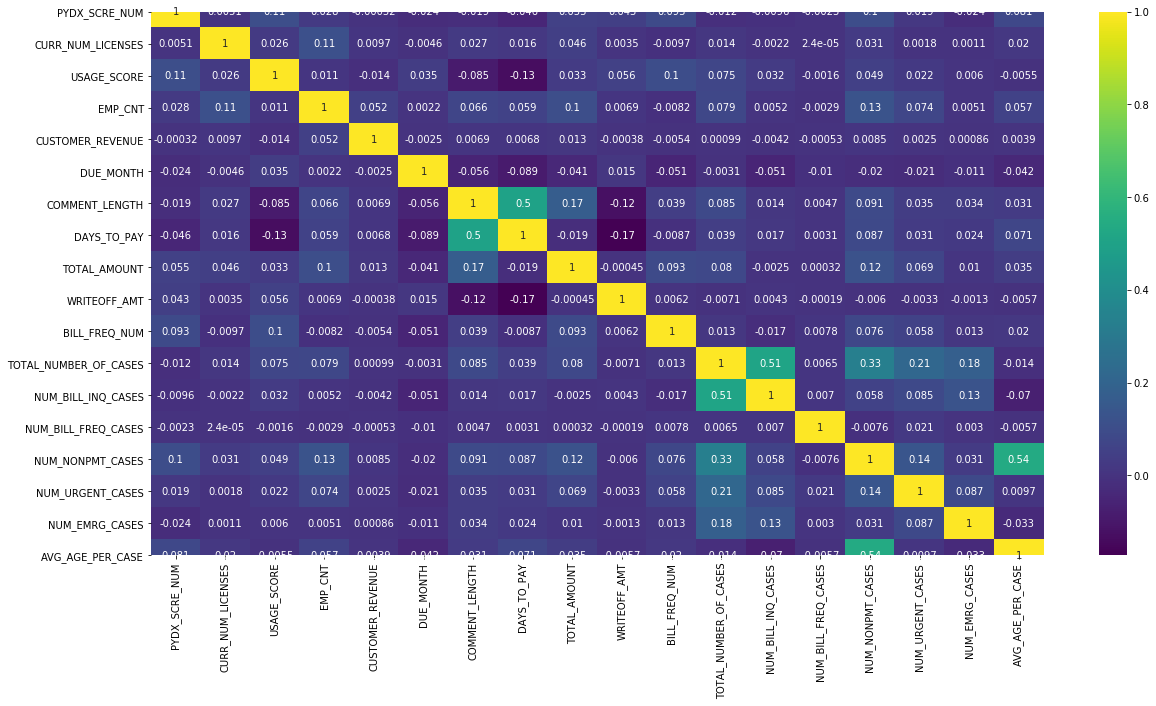

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True, cmap = 'viridis')

In [9]:
data=data.drop(['INVOICE_ID','DAYS_TO_PAY','ACCT_ID','BAD_DEBT_FLAG','WRITEOFF_AMT','COMMENT_LENGTH'],axis=1)
data=pd.get_dummies(data)
X=data.drop('LATE_PMT_GT_30',axis=1)
Y=data['LATE_PMT_GT_30']

In [10]:
data.select_dtypes(include=['float64','int64'])

,PYDX_SCRE_NUM,CURR_NUM_LICENSES,USAGE_SCORE,EMP_CNT,CUSTOMER_REVENUE,DUE_MONTH,TOTAL_AMOUNT,BALANCE_DUE,BILL_FREQ_NUM,TOTAL_NUMBER_OF_CASES,NUM_BILL_INQ_CASES,NUM_BILL_FREQ_CASES,NUM_NONPMT_CASES,NUM_URGENT_CASES,NUM_EMRG_CASES,AVG_AGE_PER_CASE
0,129.0,2.0,61.0,276.0,9.959414e+07,9,12359.562374,0,12,1,1,0,0,0,0,0.630
1,0.0,19.0,14.0,200.0,0.000000e+00,6,14063.760000,0,12,0,0,0,0,0,0,0.000
2,0.0,15.0,87.0,200.0,5.196537e+06,10,3070.128000,0,12,1,0,0,0,0,0,7.660
3,77.0,435.0,86.0,250.0,7.966400e+06,4,7554.307320,0,12,1,0,0,0,0,0,0.130
4,0.0,6.0,41.0,150.0,1.820000e+07,8,3060.936000,0,12,6,1,0,0,0,0,0.447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84229,82.0,190.0,84.0,308.0,8.938353e+07,2,34119.842097,0,12,3,2,0,0,0,0,1.013
84230,129.0,6772.0,89.0,11393.0,5.725873e+09,6,5314.661200,0,12,1,0,0,0,0,0,0.000
84231,0.0,13.0,42.0,50.0,0.000000e+00,9,12009.348000,0,12,0,0,0,0,0,0,0.000
84232,185.0,426.0,14.0,800.0,0.000000e+00,3,843175.878034,0,12,4,0,0,0,0,0,6.828


In [11]:
Y=Y.replace(to_replace =[True,False] ,
                   value =["Late","Not Late"]) 

In [12]:
Y

0            Late
1            Late
2            Late
3        Not Late
4            Late
           ...   
84229    Not Late
84230        Late
84231    Not Late
84232        Late
84233        Late
Name: LATE_PMT_GT_30, Length: 84234, dtype: object

In [13]:
df=pd.concat([Num_cols,Y],axis=1)

In [14]:
df

,PYDX_SCRE_NUM,CURR_NUM_LICENSES,USAGE_SCORE,EMP_CNT,CUSTOMER_REVENUE,DUE_MONTH,COMMENT_LENGTH,DAYS_TO_PAY,TOTAL_AMOUNT,WRITEOFF_AMT,BILL_FREQ_NUM,TOTAL_NUMBER_OF_CASES,NUM_BILL_INQ_CASES,NUM_BILL_FREQ_CASES,NUM_NONPMT_CASES,NUM_URGENT_CASES,NUM_EMRG_CASES,AVG_AGE_PER_CASE,LATE_PMT_GT_30
0,129.0,2.0,61.0,276.0,9.959414e+07,9,33,71,12359.562374,0.0,12,1,1,0,0,0,0,0.630,Late
1,0.0,19.0,14.0,200.0,0.000000e+00,6,170,46,14063.760000,0.0,12,0,0,0,0,0,0,0.000,Late
2,0.0,15.0,87.0,200.0,5.196537e+06,10,199,31,3070.128000,0.0,12,1,0,0,0,0,0,7.660,Late
3,77.0,435.0,86.0,250.0,7.966400e+06,4,109,22,7554.307320,0.0,12,1,0,0,0,0,0,0.130,Not Late
4,0.0,6.0,41.0,150.0,1.820000e+07,8,723,66,3060.936000,0.0,12,6,1,0,0,0,0,0.447,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84229,82.0,190.0,84.0,308.0,8.938353e+07,2,39,13,34119.842097,0.0,12,3,2,0,0,0,0,1.013,Not Late
84230,129.0,6772.0,89.0,11393.0,5.725873e+09,6,499,95,5314.661200,0.0,12,1,0,0,0,0,0,0.000,Late
84231,0.0,13.0,42.0,50.0,0.000000e+00,9,42,2,12009.348000,0.0,12,0,0,0,0,0,0,0.000,Not Late
84232,185.0,426.0,14.0,800.0,0.000000e+00,3,499,32,843175.878034,0.0,12,4,0,0,0,0,0,6.828,Late


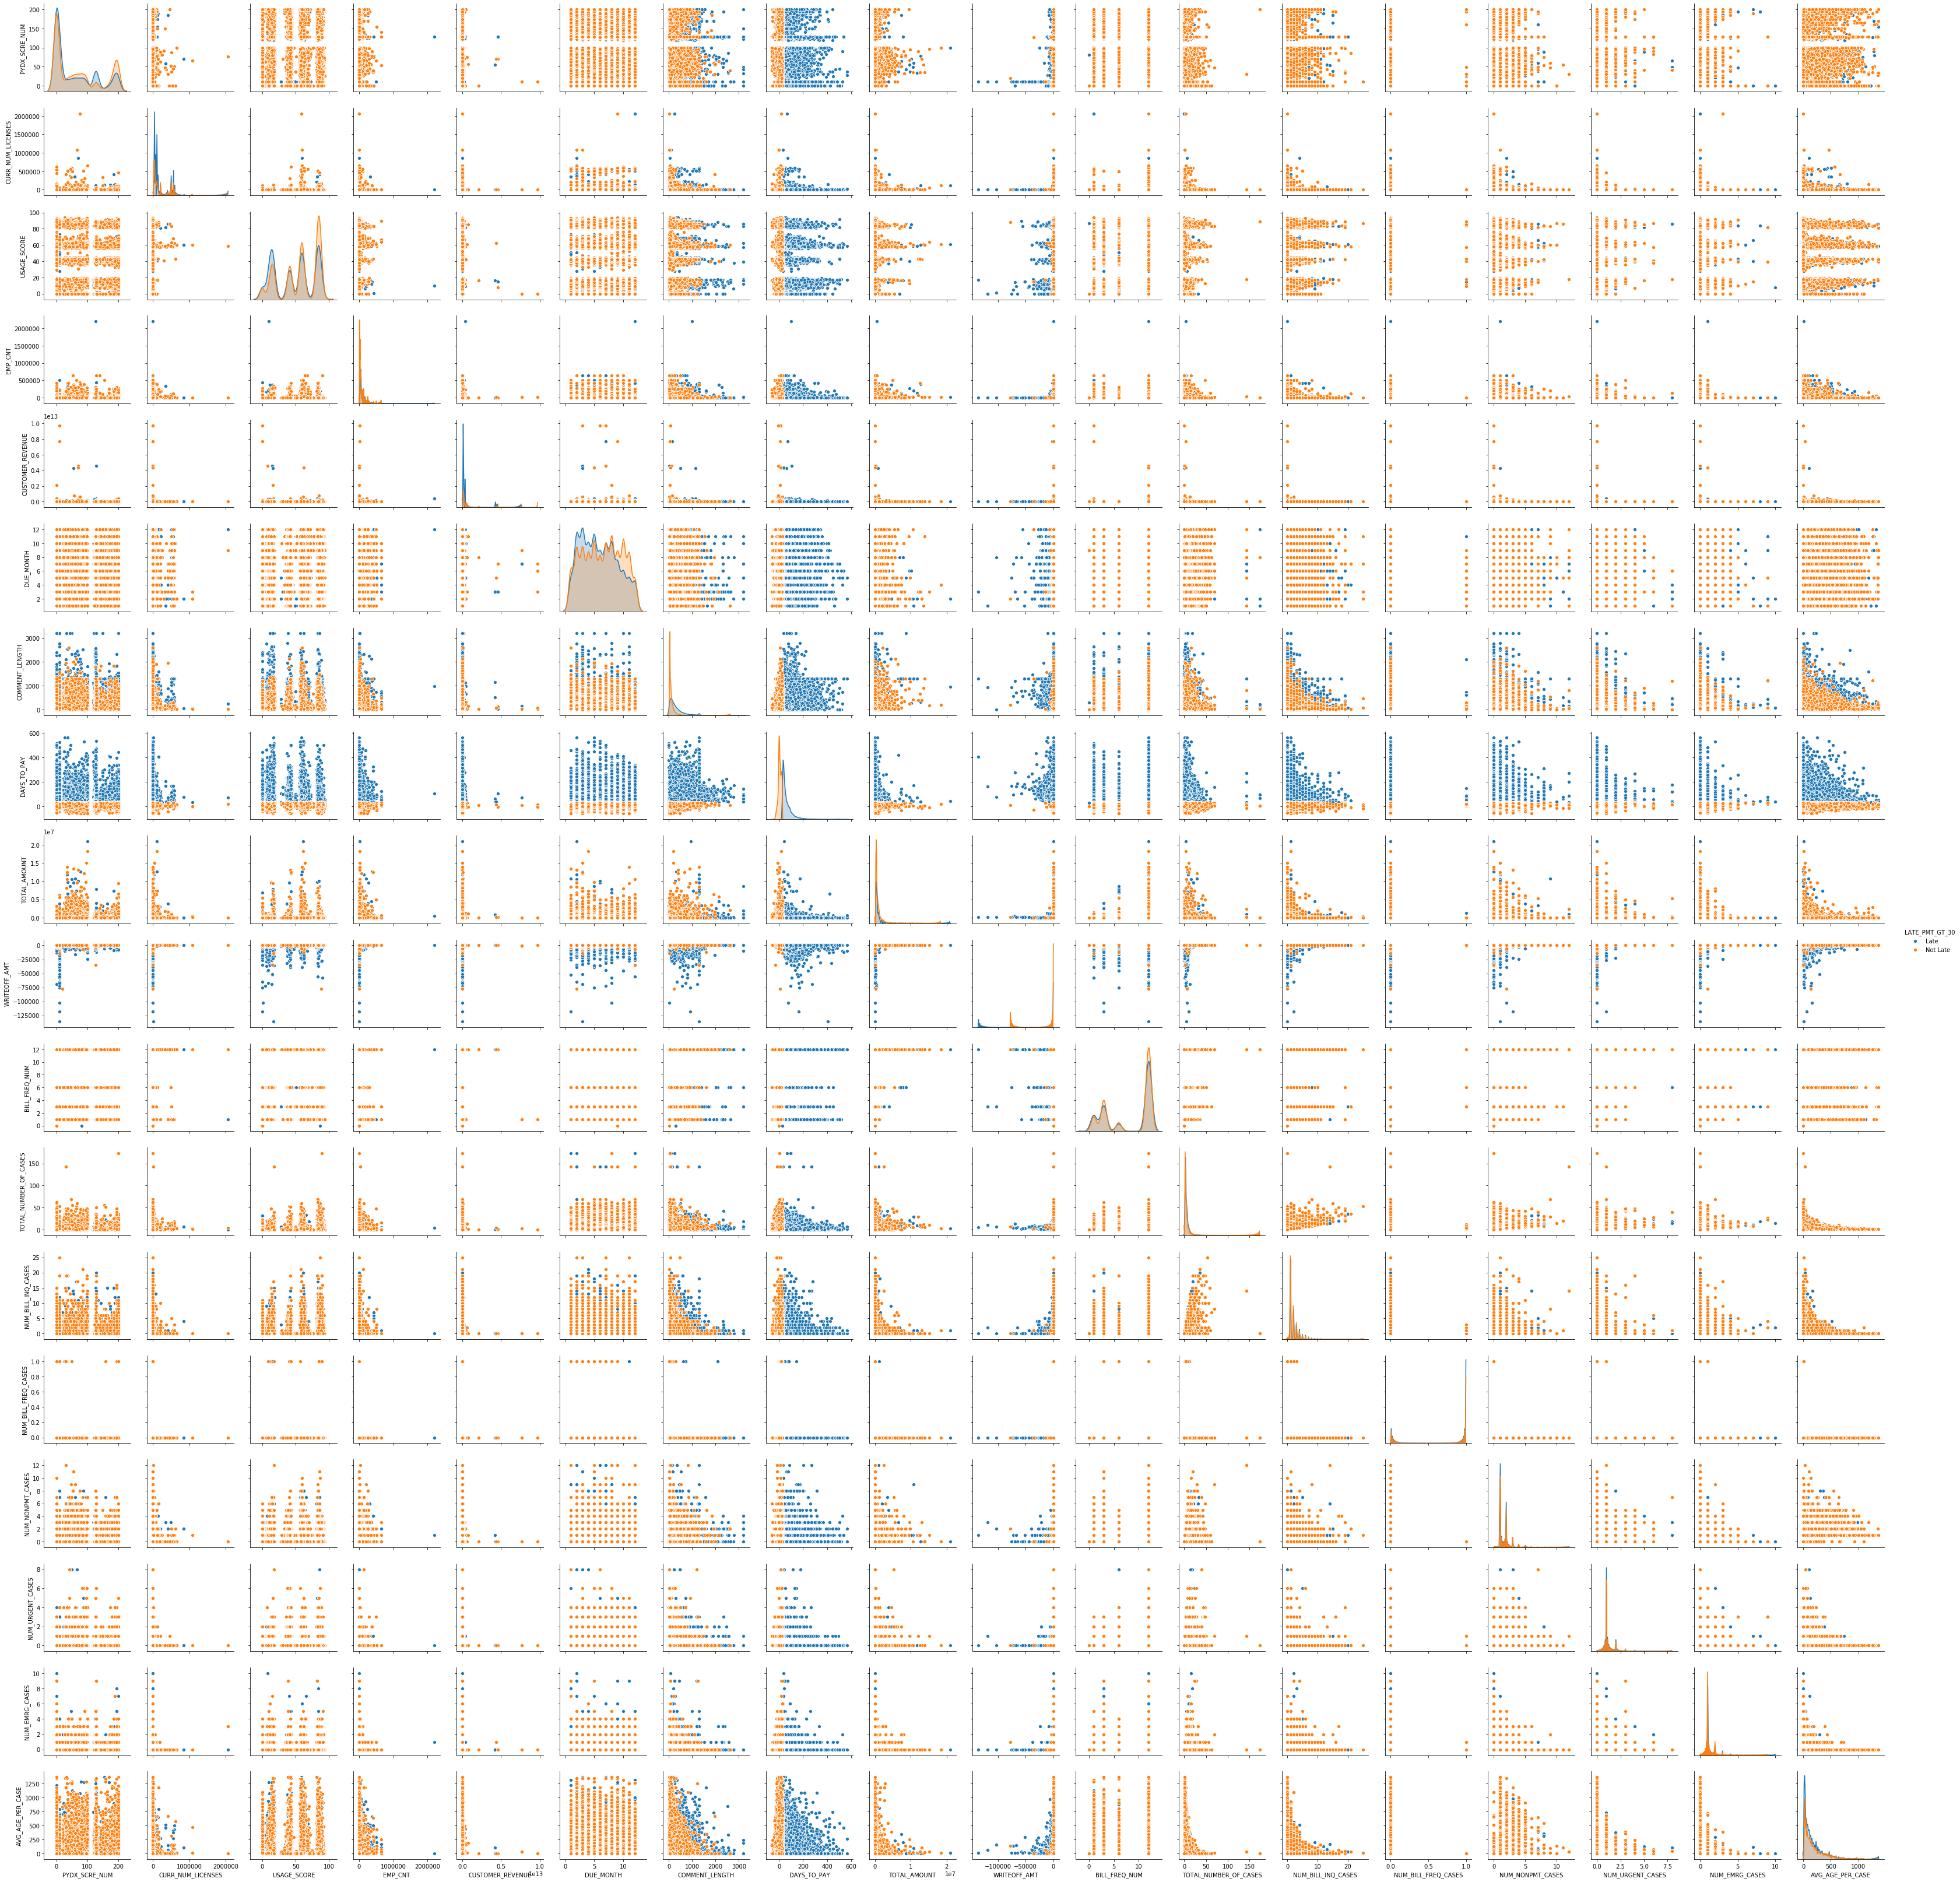

In [16]:
g=sns.pairplot(df,hue='LATE_PMT_GT_30')

In [15]:
df_cols=data.dtypes
df_cols.to_csv('new_dtypes.csv',header = True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [17]:
############ Feature Selection: Starts ######################

In [18]:
############ Variance Threshold: Starts ######################

In [19]:
from sklearn.feature_selection import VarianceThreshold

In [20]:
X_train

,PYDX_SCRE_NUM,CURR_NUM_LICENSES,USAGE_SCORE,EMP_CNT,CUSTOMER_REVENUE,DUE_MONTH,HAS_TAX_EXEMP,HAS_30DAY_EXTXN,PAST_DUE_FLG,TOTAL_AMOUNT,...,PAYMENT_TERM_Net60EOM,PAYMENT_TYPE_Check,PAYMENT_TYPE_Wire Transfer,CURRENCY_CODE_AUD,CURRENCY_CODE_CAD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,CURRENCY_CODE_JPY,CURRENCY_CODE_SEK,CURRENCY_CODE_USD
33445,38.0,912.0,57.0,1000.0,2.125236e+08,7,False,True,False,1294.60128,...,0,1,0,0,0,0,0,0,0,1
45654,159.0,114.0,63.0,611.0,1.643810e+08,3,False,True,False,9927.36000,...,0,1,0,0,0,0,0,0,0,1
47664,180.0,208.0,17.0,2000.0,1.063625e+07,10,False,True,False,96525.97332,...,0,0,1,0,0,0,0,0,0,1
46657,0.0,9.0,82.0,30.0,0.000000e+00,2,False,True,False,1064.62510,...,0,1,0,0,0,0,0,0,0,1
62976,195.0,209.0,88.0,95.0,3.360705e+06,2,False,True,False,7660.00000,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,195.0,0.0,0.0,3.0,2.002254e+07,4,False,True,False,43.31730,...,0,1,0,0,0,1,0,0,0,0
45891,47.0,890.0,83.0,8000.0,1.903921e+07,6,False,True,False,7864.82074,...,0,1,0,0,0,0,0,0,0,1
42613,36.0,227.0,84.0,630.0,6.650389e+07,4,False,True,False,314935.15500,...,0,1,0,0,0,0,0,0,0,1
43567,195.0,25.0,42.0,27.0,4.352629e+06,2,False,True,False,120.13178,...,0,1,0,0,0,0,0,0,0,1


In [21]:
selector_vt = VarianceThreshold()

X_train_vt=selector_vt.fit_transform(X_train,y_train)

In [22]:
X_train_vt

array([[38.0, 912.0, 57.0, ..., 0, 0, 1],
       [159.0, 114.0, 63.0, ..., 0, 0, 1],
       [180.0, 208.0, 17.0, ..., 0, 0, 1],
       ...,
       [36.0, 227.0, 84.0, ..., 0, 0, 1],
       [195.0, 25.0, 42.0, ..., 0, 0, 1],
       [10.0, 0.0, 82.0, ..., 0, 0, 1]], dtype=object)

In [23]:
X_train_vt.shape

(67387, 443)

In [24]:
############ Conversion from numpy to pandas with column names ################
X_train_vt=X_train[X_train.columns[selector_vt.get_support(indices=True)]]

In [25]:
X_train_vt

,PYDX_SCRE_NUM,CURR_NUM_LICENSES,USAGE_SCORE,EMP_CNT,CUSTOMER_REVENUE,DUE_MONTH,HAS_TAX_EXEMP,TOTAL_AMOUNT,BILL_FREQ_NUM,TOTAL_NUMBER_OF_CASES,...,PAYMENT_TERM_Net60EOM,PAYMENT_TYPE_Check,PAYMENT_TYPE_Wire Transfer,CURRENCY_CODE_AUD,CURRENCY_CODE_CAD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,CURRENCY_CODE_JPY,CURRENCY_CODE_SEK,CURRENCY_CODE_USD
33445,38.0,912.0,57.0,1000.0,2.125236e+08,7,False,1294.60128,1,0,...,0,1,0,0,0,0,0,0,0,1
45654,159.0,114.0,63.0,611.0,1.643810e+08,3,False,9927.36000,12,1,...,0,1,0,0,0,0,0,0,0,1
47664,180.0,208.0,17.0,2000.0,1.063625e+07,10,False,96525.97332,6,0,...,0,0,1,0,0,0,0,0,0,1
46657,0.0,9.0,82.0,30.0,0.000000e+00,2,False,1064.62510,12,1,...,0,1,0,0,0,0,0,0,0,1
62976,195.0,209.0,88.0,95.0,3.360705e+06,2,False,7660.00000,1,2,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,195.0,0.0,0.0,3.0,2.002254e+07,4,False,43.31730,1,5,...,0,1,0,0,0,1,0,0,0,0
45891,47.0,890.0,83.0,8000.0,1.903921e+07,6,False,7864.82074,12,15,...,0,1,0,0,0,0,0,0,0,1
42613,36.0,227.0,84.0,630.0,6.650389e+07,4,False,314935.15500,12,6,...,0,1,0,0,0,0,0,0,0,1
43567,195.0,25.0,42.0,27.0,4.352629e+06,2,False,120.13178,12,3,...,0,1,0,0,0,0,0,0,0,1


In [26]:
X_train_vt.shape

(67387, 443)

In [27]:
############ Columns having almost all the vales same , i.e. very low variance. Default threshold=0 #########
X_train[X_train.columns.difference(X_train_vt.columns)]

,BALANCE_DUE,BILLING_COUNTRY_CM,BILLING_COUNTRY_JM,BILLING_COUNTRY_OM,BILLING_COUNTRY_PY,BILLING_COUNTRY_RE,COLLECTOR_0050M00000EI9jjQAD,HAS_30DAY_EXTXN,INDUSTRY_NM_Retail,INDUSTRY_NM_Retail_Consumer,PAST_DUE_FLG
33445,0,0,0,0,0,0,0,True,0,0,False
45654,0,0,0,0,0,0,0,True,0,0,False
47664,0,0,0,0,0,0,0,True,0,0,False
46657,0,0,0,0,0,0,0,True,0,0,False
62976,0,0,0,0,0,0,0,True,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
21243,0,0,0,0,0,0,0,True,0,0,False
45891,0,0,0,0,0,0,0,True,0,0,False
42613,0,0,0,0,0,0,0,True,0,0,False
43567,0,0,0,0,0,0,0,True,0,0,False


In [28]:
selector_vt = VarianceThreshold(threshold=0.005)

X_train_vt=selector_vt.fit_transform(X_train,y_train)

In [29]:
X_train_vt

array([[38.0, 912.0, 57.0, ..., 0, 0, 1],
       [159.0, 114.0, 63.0, ..., 0, 0, 1],
       [180.0, 208.0, 17.0, ..., 0, 0, 1],
       ...,
       [36.0, 227.0, 84.0, ..., 0, 0, 1],
       [195.0, 25.0, 42.0, ..., 0, 0, 1],
       [10.0, 0.0, 82.0, ..., 0, 0, 1]], dtype=object)

In [30]:
X_train_vt.shape

(67387, 162)

In [31]:
############ Conversion from numpy to pandas with column names ################
X_train_vt=X_train[X_train.columns[selector_vt.get_support(indices=True)]]

In [32]:
X_train_vt

,PYDX_SCRE_NUM,CURR_NUM_LICENSES,USAGE_SCORE,EMP_CNT,CUSTOMER_REVENUE,DUE_MONTH,HAS_TAX_EXEMP,TOTAL_AMOUNT,BILL_FREQ_NUM,TOTAL_NUMBER_OF_CASES,...,PAYMENT_TERM_Net45,PAYMENT_TERM_Net60,PAYMENT_TYPE_Check,PAYMENT_TYPE_Wire Transfer,CURRENCY_CODE_AUD,CURRENCY_CODE_CAD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,CURRENCY_CODE_JPY,CURRENCY_CODE_USD
33445,38.0,912.0,57.0,1000.0,2.125236e+08,7,False,1294.60128,1,0,...,0,0,1,0,0,0,0,0,0,1
45654,159.0,114.0,63.0,611.0,1.643810e+08,3,False,9927.36000,12,1,...,1,0,1,0,0,0,0,0,0,1
47664,180.0,208.0,17.0,2000.0,1.063625e+07,10,False,96525.97332,6,0,...,1,0,0,1,0,0,0,0,0,1
46657,0.0,9.0,82.0,30.0,0.000000e+00,2,False,1064.62510,12,1,...,0,0,1,0,0,0,0,0,0,1
62976,195.0,209.0,88.0,95.0,3.360705e+06,2,False,7660.00000,1,2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,195.0,0.0,0.0,3.0,2.002254e+07,4,False,43.31730,1,5,...,0,0,1,0,0,0,1,0,0,0
45891,47.0,890.0,83.0,8000.0,1.903921e+07,6,False,7864.82074,12,15,...,0,0,1,0,0,0,0,0,0,1
42613,36.0,227.0,84.0,630.0,6.650389e+07,4,False,314935.15500,12,6,...,0,0,1,0,0,0,0,0,0,1
43567,195.0,25.0,42.0,27.0,4.352629e+06,2,False,120.13178,12,3,...,0,0,1,0,0,0,0,0,0,1


In [33]:
X_train_vt.shape

(67387, 162)

In [34]:
len(set(X_train.columns)-set(X_train_vt))

292

In [35]:
################# Columns having very little variance, threshold=0.005 ####################
X_train[list(set(X_train.columns)-set(X_train_vt))]

,BILLING_COUNTRY_OM,BILLING_COUNTRY_RE,INDUSTRY_NM_Healthcare,CR_CHK_CD_Payment Plan,COLLECTOR_00530000003gv4uAAA,BILLING_COUNTRY_AT,COLLECTOR_0050M00000D0YUKQA3,COLLECTOR_0050M00000D0b9UQAR,BILLING_COUNTRY_LK,BILLING_COUNTRY_FO,...,COLLECTOR_00530000001fkhaAAA,BILLING_COUNTRY_SA,COLLECTOR_0050M00000CAyiPQAT,BILLING_COUNTRY_BZ,BALANCE_DUE,BILLING_COUNTRY_TC,COLLECTOR_0050M00000CNUsSQAX,INDUSTRY_NM_Health_Care,CRNCY_ISO_CD_SEK,INDUSTRY_NM_Energy & Utilities
33445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
mask_vt=selector_vt.get_support()
mask_vt

array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False,  True, False,  True, False, False,  True,
       False, False, False, False,  True,  True, False,  True,  True,
        True, False,  True, False,  True, False, False,  True,  True,
       False,  True,  True,  True, False,  True,  True, False,  True,
        True, False,  True, False, False,  True, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True,

In [37]:
X_test_vt = selector_vt.transform(X_test)
X_test_vt.shape

(16847, 162)

In [38]:
X_test_vt=X_test[X_test.columns[selector_vt.get_support(indices=True)]]
X_test_vt

,PYDX_SCRE_NUM,CURR_NUM_LICENSES,USAGE_SCORE,EMP_CNT,CUSTOMER_REVENUE,DUE_MONTH,HAS_TAX_EXEMP,TOTAL_AMOUNT,BILL_FREQ_NUM,TOTAL_NUMBER_OF_CASES,...,PAYMENT_TERM_Net45,PAYMENT_TERM_Net60,PAYMENT_TYPE_Check,PAYMENT_TYPE_Wire Transfer,CURRENCY_CODE_AUD,CURRENCY_CODE_CAD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,CURRENCY_CODE_JPY,CURRENCY_CODE_USD
16591,0.0,102376.0,63.0,2111.0,1.643836e+08,6,False,8732.767680,1,0,...,1,0,1,0,0,0,1,0,0,0
71053,195.0,69.0,85.0,146.0,7.277000e+06,6,False,413.640000,3,3,...,0,0,1,0,0,0,0,0,0,1
13057,0.0,49.0,18.0,40.0,0.000000e+00,7,False,1218.889840,12,26,...,0,0,1,0,0,0,0,0,0,1
53963,185.0,89.0,42.0,100.0,9.668814e+06,8,False,44006.431900,12,5,...,0,0,1,0,0,0,0,0,0,1
28249,100.0,24.0,60.0,28.0,1.934829e+07,7,False,348.055540,12,4,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,127.0,40.0,81.0,400.0,1.443650e+05,1,False,370.751660,12,2,...,0,0,1,0,0,0,0,0,0,1
52985,0.0,8.0,16.0,14.0,0.000000e+00,9,False,168.103296,3,7,...,0,0,0,1,0,0,0,1,0,0
34513,0.0,4.0,83.0,150.0,2.285356e+07,11,False,17735.734200,6,3,...,0,0,1,0,0,0,0,0,0,1
11220,71.0,0.0,41.0,800.0,2.198420e+07,3,False,3830.000000,12,5,...,0,0,1,0,0,0,0,0,0,1


In [39]:
############ Variance Threshold: Ends ######################

In [40]:
############ SelectPercentile: Starts ######################

In [41]:
from sklearn.feature_selection import SelectPercentile, chi2, f_classif, mutual_info_classif

In [42]:
selector_sp = SelectPercentile(f_classif, percentile=50)

X_train_sp=selector_sp.fit_transform(X_train_vt,y_train)
X_train_sp.shape

(67387, 81)

In [43]:
X_train_sp

array([[38.0, 57.0, 1000.0, ..., 0, 0, 1],
       [159.0, 63.0, 611.0, ..., 0, 0, 1],
       [180.0, 17.0, 2000.0, ..., 0, 0, 1],
       ...,
       [36.0, 84.0, 630.0, ..., 0, 0, 1],
       [195.0, 42.0, 27.0, ..., 0, 0, 1],
       [10.0, 82.0, 15.0, ..., 0, 0, 1]], dtype=object)

In [44]:
############ Conversion from numpy to pandas with column names ################
X_train_sp=X_train_vt[X_train_vt.columns[selector_sp.get_support(indices=True)]]

In [45]:
X_train_sp

,PYDX_SCRE_NUM,USAGE_SCORE,EMP_CNT,DUE_MONTH,HAS_TAX_EXEMP,TOTAL_AMOUNT,BILL_FREQ_NUM,TOTAL_NUMBER_OF_CASES,NUM_BILL_INQ_CASES,NUM_NONPMT_CASES,...,BILLING_COUNTRY_SE,BILLING_COUNTRY_SG,BILLING_COUNTRY_US,BILLING_LANGUAGE_English,BILLING_LANGUAGE_German,PAYMENT_TYPE_Check,PAYMENT_TYPE_Wire Transfer,CURRENCY_CODE_AUD,CURRENCY_CODE_EUR,CURRENCY_CODE_USD
33445,38.0,57.0,1000.0,7,False,1294.60128,1,0,0,0,...,0,0,1,1,0,1,0,0,0,1
45654,159.0,63.0,611.0,3,False,9927.36000,12,1,0,0,...,0,0,1,1,0,1,0,0,0,1
47664,180.0,17.0,2000.0,10,False,96525.97332,6,0,0,0,...,0,0,0,1,0,0,1,0,0,1
46657,0.0,82.0,30.0,2,False,1064.62510,12,1,0,0,...,0,0,1,1,0,1,0,0,0,1
62976,195.0,88.0,95.0,2,False,7660.00000,1,2,1,1,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,195.0,0.0,3.0,4,False,43.31730,1,5,2,2,...,0,0,0,1,0,1,0,0,1,0
45891,47.0,83.0,8000.0,6,False,7864.82074,12,15,0,0,...,0,0,1,1,0,1,0,0,0,1
42613,36.0,84.0,630.0,4,False,314935.15500,12,6,1,2,...,0,0,1,1,0,1,0,0,0,1
43567,195.0,42.0,27.0,2,False,120.13178,12,3,2,0,...,0,0,1,1,0,1,0,0,0,1


In [46]:
X_test_sp = selector_sp.transform(X_test_vt)
X_test_sp.shape

(16847, 81)

In [47]:
X_test_sp

array([[0.0, 63.0, 2111.0, ..., 0, 1, 0],
       [195.0, 85.0, 146.0, ..., 0, 0, 1],
       [0.0, 18.0, 40.0, ..., 0, 0, 1],
       ...,
       [0.0, 83.0, 150.0, ..., 0, 0, 1],
       [71.0, 41.0, 800.0, ..., 0, 0, 1],
       [48.0, 83.0, 14000.0, ..., 0, 0, 1]], dtype=object)

In [48]:
############ Conversion from numpy to pandas with column names ################
X_test_sp=X_test_vt[X_test_vt.columns[selector_sp.get_support(indices=True)]]

In [49]:
X_test_sp

,PYDX_SCRE_NUM,USAGE_SCORE,EMP_CNT,DUE_MONTH,HAS_TAX_EXEMP,TOTAL_AMOUNT,BILL_FREQ_NUM,TOTAL_NUMBER_OF_CASES,NUM_BILL_INQ_CASES,NUM_NONPMT_CASES,...,BILLING_COUNTRY_SE,BILLING_COUNTRY_SG,BILLING_COUNTRY_US,BILLING_LANGUAGE_English,BILLING_LANGUAGE_German,PAYMENT_TYPE_Check,PAYMENT_TYPE_Wire Transfer,CURRENCY_CODE_AUD,CURRENCY_CODE_EUR,CURRENCY_CODE_USD
16591,0.0,63.0,2111.0,6,False,8732.767680,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
71053,195.0,85.0,146.0,6,False,413.640000,3,3,2,0,...,0,0,1,1,0,1,0,0,0,1
13057,0.0,18.0,40.0,7,False,1218.889840,12,26,2,0,...,0,0,1,1,0,1,0,0,0,1
53963,185.0,42.0,100.0,8,False,44006.431900,12,5,0,0,...,0,0,0,1,0,1,0,0,0,1
28249,100.0,60.0,28.0,7,False,348.055540,12,4,2,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,127.0,81.0,400.0,1,False,370.751660,12,2,0,0,...,0,0,0,1,0,1,0,0,0,1
52985,0.0,16.0,14.0,9,False,168.103296,3,7,4,0,...,0,0,0,1,0,0,1,0,0,0
34513,0.0,83.0,150.0,11,False,17735.734200,6,3,0,0,...,0,0,0,1,0,1,0,0,0,1
11220,71.0,41.0,800.0,3,False,3830.000000,12,5,0,2,...,0,0,1,1,0,1,0,0,0,1


In [50]:
############ SelectPercentile: Ends ######################

In [ ]:
############ Logistic Regression: Starts ######################

In [ ]:
############ Original Features ######################

In [80]:
l=[0.1,1,5,10,15]
logreg_orig=LogisticRegressionCV(Cs=l,solver="saga",cv=5, max_iter=10000, penalty='l2')
logreg_orig.fit(X=X_train, y=y_train)
y_pred_orig=logreg_orig.predict(X_test)
score_orig = accuracy_score(y_test, y_pred_orig)
cf_orig=confusion_matrix(y_test, y_pred_orig)

In [81]:
score_orig

0.6466433192853327

In [82]:
fig, ax = plot_confusion_matrix(conf_mat=binary)
plt.show()=pd.DataFrame(
    cf_orig,
    columns=['Predicted Not Late', 'Predicted Late'],
    index=['Actual Not Late', 'Actual Late']
)

,Predicted Not Late,Predicted Late
Actual Not Late,4,5949
Actual Late,4,10890


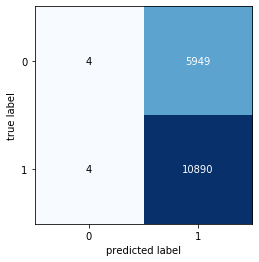

In [90]:
fig, ax = plot_confusion_matrix(conf_mat=cf_orig)
plt.show()

In [91]:
############ Selected Features ######################

l=[0.1,1,5,10,15]
logreg_sel=LogisticRegressionCV(Cs=l,solver="saga",cv=5, max_iter=10000, penalty='l2')
logreg_sel.fit(X=X_train_sp, y=y_train)
y_pred_sel=logreg_sel.predict(X_test_sp)
score_sel = accuracy_score(y_test, y_pred_sel)
cf_sel=confusion_matrix(y_test, y_pred_sel)

In [92]:
score_sel

0.6995904315308363

In [93]:
pd.DataFrame(
    cf_sel,
    columns=['Predicted Not Late', 'Predicted Late'],
    index=['Actual Not Late', 'Actual Late']
)

,Predicted Not Late,Predicted Late
Actual Not Late,3117,2836
Actual Late,2225,8669


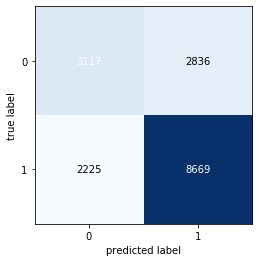

In [94]:
fig, ax = plot_confusion_matrix(conf_mat=cf_sel)
plt.show()

In [95]:
############ Logistic Regression: Ends ######################

In [96]:
############ Decision Tree: Starts ######################

In [68]:
from sklearn import tree
import graphviz 

In [69]:
############ Original Features with full depth ######################
clf_orig = tree.DecisionTreeClassifier()
clf_orig.fit(X_train, y_train)
y_pred_dt_orig = clf_orig.predict(X_test)

acc_dt_orig=accuracy_score(y_test, y_pred_dt_orig)
acc_dt_orig

0.6649255060248115

In [70]:
cf_dt_orig=confusion_matrix(y_test, y_pred_dt_orig)
cf_dt_orig

array([[3091, 2862],
       [2783, 8111]], dtype=int64)

In [71]:
pd.DataFrame(
    cf_dt_orig,
    columns=['Predicted Not Late', 'Predicted Late'],
    index=['Actual Not Late', 'Actual Late']
)

,Predicted Not Late,Predicted Late
Actual Not Late,3091,2862
Actual Late,2783,8111


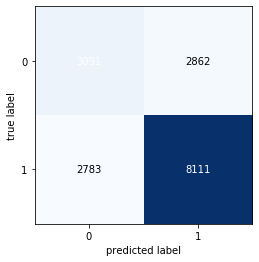

In [72]:
fig, ax = plot_confusion_matrix(conf_mat=cf_dt_orig)
plt.show()

In [73]:
############ Testing with Train data will give 100% accuracy if we allow tree to branch to its full depth #############
#################### Original Features with full depth on train data ######################
clf_orig = tree.DecisionTreeClassifier()
clf_orig.fit(X_train, y_train)
y_pred_dt_orig_train = clf_orig.predict(X_train)

acc_dt_orig=accuracy_score(y_train, y_pred_dt_orig_train)
acc_dt_orig

0.9997328861649873

In [74]:
############ Testing with Test data and depth = 1. Original Features with full depth on train data ######################
clf_orig = tree.DecisionTreeClassifier(max_depth=1)
clf_orig.fit(X_train, y_train)
y_pred_dt_orig_train = clf_orig.predict(X_test)

acc_dt_orig=accuracy_score(y_test, y_pred_dt_orig_train)
acc_dt_orig

0.6722858669199264

In [75]:
columns=list(X_train.columns)

[Text(167.4, 163.07999999999998, 'COLLECTION_STATUS_Non Responsive <= 0.5\ngini = 0.45\nsamples = 67387\nvalue = [23046, 44341]'),
 Text(83.7, 54.360000000000014, 'gini = 0.415\nsamples = 54886\nvalue = [16103, 38783]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.494\nsamples = 12501\nvalue = [6943, 5558]')]

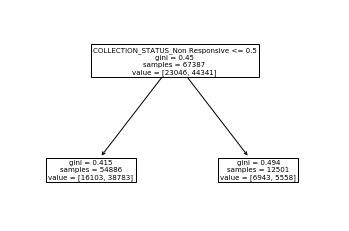

In [76]:
tree.plot_tree(clf_orig,feature_names =columns)

In [78]:
from sklearn.metrics import f1_score

In [79]:
f1_macro=f1_score(y_test, y_pred_dt_orig_train, average='macro') 
f1_macro

0.5856924884456325

In [80]:
f1_micro=f1_score(y_test, y_pred_dt_orig_train, average='micro') 
f1_micro

0.6722858669199264

In [81]:
f1_weighted=f1_score(y_test, y_pred_dt_orig_train, average='weighted')
f1_weighted

0.6412440183133923

In [82]:
f1_average=f1_score(y_test, y_pred_dt_orig_train, average=None)
f1_average

array([0.39628212, 0.77510286])

In [112]:
############ Selected Features ######################
clf_sel = tree.DecisionTreeClassifier(max_depth=4)
clf_sel.fit(X_train_sp, y_train)
y_pred_dt_sel = clf_sel.predict(X_test_sp)

acc_dt_orig=accuracy_score(y_test, y_pred_dt_sel)
acc_dt_orig

0.6923487861340298

In [113]:
cf_dt_sel=confusion_matrix(y_test, y_pred_dt_orig)
cf_dt_sel

array([[3095, 2858],
       [2781, 8113]], dtype=int64)

In [114]:
pd.DataFrame(
    cf_dt_sel,
    columns=['Predicted Not Late', 'Predicted Late'],
    index=['Actual Not Late', 'Actual Late']
)

,Predicted Not Late,Predicted Late
Actual Not Late,3095,2858
Actual Late,2781,8113


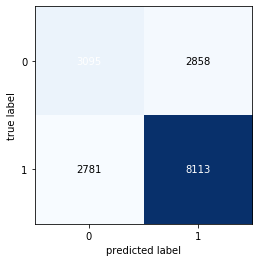

In [115]:
fig, ax = plot_confusion_matrix(conf_mat=cf_dt_sel)
plt.show()

In [117]:
columns_1=list(X_train_sp.columns)

[Text(167.4, 195.696, 'COLLECTION_STATUS_Non Responsive <= 0.5\ngini = 0.45\nsamples = 67387\nvalue = [23046, 44341]'),
 Text(83.7, 152.208, 'COLLECTION_STATUS_Courtesy Contact <= 0.5\ngini = 0.415\nsamples = 54886\nvalue = [16103, 38783]'),
 Text(41.85, 108.72, 'CR_CHK_CD_Defer Revenue <= 0.5\ngini = 0.447\nsamples = 39866\nvalue = [13470, 26396]'),
 Text(20.925, 65.232, 'COLLECTION_STATUS_Promise To Pay <= 0.5\ngini = 0.434\nsamples = 36683\nvalue = [11687, 24996]'),
 Text(10.4625, 21.744, 'gini = 0.489\nsamples = 7568\nvalue = [3216, 4352]'),
 Text(31.387500000000003, 21.744, 'gini = 0.413\nsamples = 29115\nvalue = [8471, 20644]'),
 Text(62.775000000000006, 65.232, 'PYDX_SCRE_NUM <= 29.5\ngini = 0.493\nsamples = 3183\nvalue = [1783, 1400]'),
 Text(52.3125, 21.744, 'gini = 0.461\nsamples = 620\nvalue = [223, 397]'),
 Text(73.2375, 21.744, 'gini = 0.476\nsamples = 2563\nvalue = [1560, 1003]'),
 Text(125.55000000000001, 108.72, 'COLLECTOR_0053000000C0XsHAAV <= 0.5\ngini = 0.289\nsample

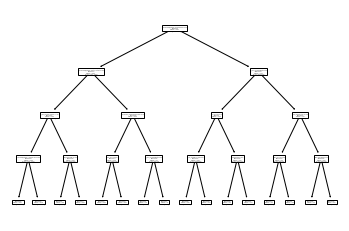

In [118]:
tree.plot_tree(clf_sel,feature_names =columns_1)

In [136]:
############ Decision Tree: Ends ######################

In [51]:
############ Random Forest : Starts ######################

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [53]:
rf_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':[2,3],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':[2,3],
           'min_samples_split':[2,4]
              }


In [122]:
############ Original Features with Randomized Search  ######################
rf_orig=RandomForestClassifier()

In [ ]:
random_search_orig = RandomizedSearchCV(rf_orig, param_distributions=rf_dist,
                                   n_iter=10, cv=5, iid=False)
random_search_orig.fit(X=X_train, y=y_train)
y_pred_rf_orig=random_search_orig.predict(X_test)

In [ ]:
acc_rf_orig=accuracy_score(y_test, y_pred_rf_orig)
acc_rf_orig

In [ ]:
cf_rf_orig=confusion_matrix(y_test, y_pred_rf_orig)
cf_rf_orig

In [ ]:
pd.DataFrame(
    cf_rf_orig,
    columns=['Predicted Not Late', 'Predicted Late'],
    index=['Actual Not Late', 'Actual Late']
)

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=cf_rf_orig)
plt.show()

In [54]:
############ Selected Features with Randomized Search  ######################
rf_sel=RandomForestClassifier()
random_search_sel = RandomizedSearchCV(rf_sel, param_distributions=rf_dist,
                                   n_iter=20, cv=5, iid=False)
random_search_sel.fit(X=X_train_sp, y=y_train)
y_pred_rf_sel=random_search_sel.predict(X_test_sp)
acc_rf_sel=accuracy_score(y_test, y_pred_rf_sel)
acc_rf_sel

0.7220276607111058

In [55]:
cf_rf_sel=confusion_matrix(y_test, y_pred_rf_sel)
cf_rf_sel

array([[ 2046,  3907],
       [  776, 10118]], dtype=int64)

In [56]:
pd.DataFrame(
    cf_rf_sel,
    columns=['Predicted Not Late', 'Predicted Late'],
    index=['Actual Not Late', 'Actual Late']
)

,Predicted Not Late,Predicted Late
Actual Not Late,2046,3907
Actual Late,776,10118


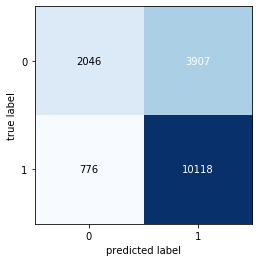

In [57]:
fig, ax = plot_confusion_matrix(conf_mat=cf_rf_sel)
plt.show()

In [59]:
from sklearn.metrics import f1_score

In [64]:
f1_macro=f1_score(y_test, y_pred_rf_sel, average='macro') 
f1_macro

0.6391979483612374

In [65]:
f1_micro=f1_score(y_test, y_pred_rf_sel, average='micro') 
f1_micro

0.7220276607111058

In [66]:
f1_weighted=f1_score(y_test, y_pred_rf_sel, average='weighted')
f1_weighted

0.6898993369539901

In [67]:
f1_average=f1_score(y_test, y_pred_rf_sel, average=None)
f1_average

array([0.46632479, 0.81207111])

In [148]:
from sklearn.model_selection import GridSearchCV

In [152]:
############ Selected Features with Grid Search  ######################
rf_sel_g=RandomForestClassifier()
random_search_sel_g = GridSearchCV(rf_sel_g, param_grid =rf_dist, cv=5, iid=False)
random_search_sel_g.fit(X=X_train_sp, y=y_train)
y_pred_rf_sel_g=random_search_sel.predict(X_test_sp)
acc_rf_sel_g=accuracy_score(y_test, y_pred_rf_sel_g)
acc_rf_sel_g

0.7835816465839616

In [156]:
cf_rf_sel_grid=confusion_matrix(y_test, y_pred_rf_sel_g)
cf_rf_sel_grid

array([[ 3075,  2878],
       [  768, 10126]], dtype=int64)

In [157]:
pd.DataFrame(
    cf_rf_sel_grid,
    columns=['Predicted Not Late', 'Predicted Late'],
    index=['Actual Not Late', 'Actual Late']
)

,Predicted Not Late,Predicted Late
Actual Not Late,3075,2878
Actual Late,768,10126


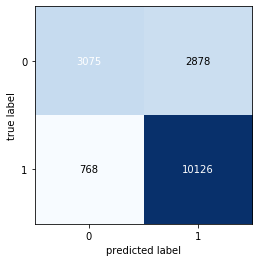

In [158]:
fig, ax = plot_confusion_matrix(conf_mat=cf_rf_sel_grid)
plt.show()

In [ ]:
############ Random Forest : Ends ######################

In [159]:
############ SVC/SVM: Starts ######################

In [160]:
from sklearn.svm import SVC

In [ ]:
################# Baseline model ####################

In [ ]:
clf = SVC(gamma='auto')

In [ ]:
clf.fit(X=X_train_sp, y=y_train)

In [ ]:
y_pred_svc_sel=clf.predict(X_test_sp)
acc_svc_sel=accuracy_score(y_test, y_pred_svc_sel)
acc_svc_sel

In [ ]:
clf_sel=confusion_matrix(y_test, y_pred_svc_sel)
clf_sel

In [ ]:
pd.DataFrame(
    clf_sel,
    columns=['Predicted Not Late', 'Predicted Late'],
    index=['Actual Not Late', 'Actual Late']
)

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=clf_sel)
plt.show()

In [162]:
############ Selected Features and GridSearchCV ######################

In [ ]:
from sklearn.model_selection import GridSearchCV

In [1]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100]},
                    {'kernel': ['linear'], 'C': [1, 10, 100]}]

In [ ]:
clf_svc_sel_g = GridSearchCV(SVC, tuned_parameters,n_jobs=-1, cv=5,
                       scoring='f1_macro')


In [ ]:
clf_svc_sel_g.fit(X=X_train_sp, y=y_train)

y_pred_svc_sel_g=clf_svc_sel_g.predict(X_test_sp)
acc_svc_sel_g=accuracy_score(y_test, y_pred_svc_sel_g)
acc_svc_sel_g

In [ ]:
cf_svc_sel_g=confusion_matrix(y_test, y_pred_svc_sel_g)
cf_svc_sel_g

In [ ]:
pd.DataFrame(
    cf_svc_sel_g,
    columns=['Predicted Not Late', 'Predicted Late'],
    index=['Actual Not Late', 'Actual Late']
)

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=cf_svc_sel_g)
plt.show()